<a href="https://colab.research.google.com/github/danielbauer1979/ML_656/blob/main/Module5_Tutorial_Non_LinearModeling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [32]:
#It appears that the automated version of skikit doesn't do all the packages)
!pip uninstall scikit-learn -y
!pip install -U scikit-learn

Found existing installation: scikit-learn 1.0
Uninstalling scikit-learn-1.0:
  Successfully uninstalled scikit-learn-1.0
  Using cached scikit_learn-1.0-cp37-cp37m-manylinux_2_12_x86_64.manylinux2010_x86_64.whl (23.1 MB)


In [10]:
import matplotlib.pyplot as plt 
import numpy as np 
import pandas as pd 

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import SplineTransformer
from sklearn.pipeline import Pipeline

from sklego.linear_model import LowessRegression

from patsy import dmatrix
#from pygam import LinearGAM, s

import statsmodels.api as sm

In [3]:
!git clone https://github.com/danielbauer1979/ML_656.git

fatal: destination path 'ML_656' already exists and is not an empty directory.


In [4]:
hwdata2 = pd.read_csv('ML_656/Davis.csv', index_col=0) 
hwdata = hwdata2.sort_values('height')

In [5]:
hwdata2.head()

,sex,weight,height,reportedWeight,reportedHeight
1,M,77,182,77.0,180.0
2,F,58,161,51.0,159.0
3,F,53,161,54.0,158.0
4,M,68,177,70.0,175.0
5,F,59,157,59.0,155.0


In [6]:
#polynomial regression. Using model pipeline
X = hwdata2[['height']]
y = hwdata2['weight']
polynomial_regression = Pipeline([('poly', PolynomialFeatures(degree=4)),('linear', LinearRegression(fit_intercept=False))])
polynomial_regression = polynomial_regression.fit(X, y)
polynomial_regression.named_steps['linear'].coef_

array([-4.57931469e+04,  1.10301542e+03, -9.93090159e+00,  3.96257277e-02,
       -5.90686627e-05])

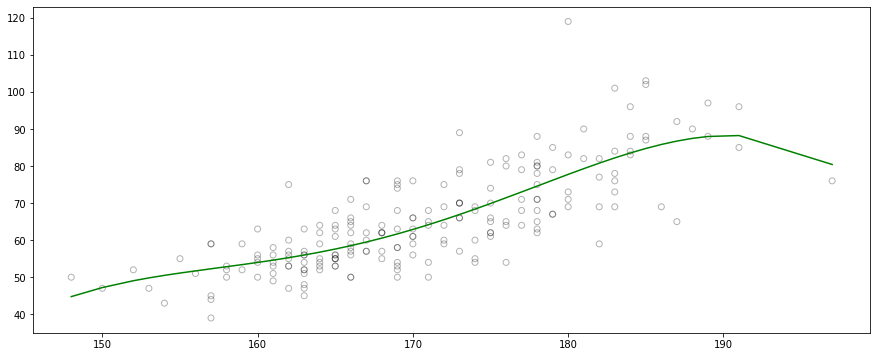

In [7]:
height_grid = np.arange(hwdata.height.min(), hwdata.height.max()).reshape(-1,1)
pred_poly = polynomial_regression.predict(hwdata[['height']])
# Scatter plot with polynomial regression line
plt.figure(figsize=(15,6))
plt.scatter(hwdata.height, hwdata.weight, facecolor='None', edgecolor='k', alpha=0.3)
plt.plot(hwdata.height, pred_poly, color='g', label='polynomial regression df=4')

In [11]:
#Regression splines. Using model pipeline
spline_regression = Pipeline([('splines', SplineTransformer(degree=2, n_knots=3, extrapolation='linear')),('linear', LinearRegression(fit_intercept=False))])
spline_regression = spline_regression.fit(X, y)
spline_regression.named_steps['linear'].coef_

array([49.56537373, 48.59679947, 85.6390441 , 98.22657749])

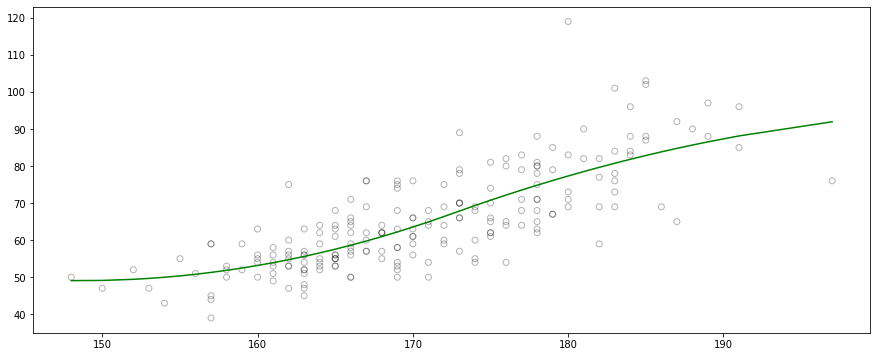

In [12]:
height_grid = np.arange(hwdata.height.min(), hwdata.height.max()).reshape(-1,1)
pred_splines = spline_regression.predict(hwdata[['height']])
# Scatter plot with polynomial regression line
plt.figure(figsize=(15,6))
plt.scatter(hwdata.height, hwdata.weight, facecolor='None', edgecolor='k', alpha=0.3)
plt.plot(hwdata.height, pred_splines, color='g', label='Spline regression')

In [23]:
local_regression = LowessRegression(sigma=50).fit(X,y)

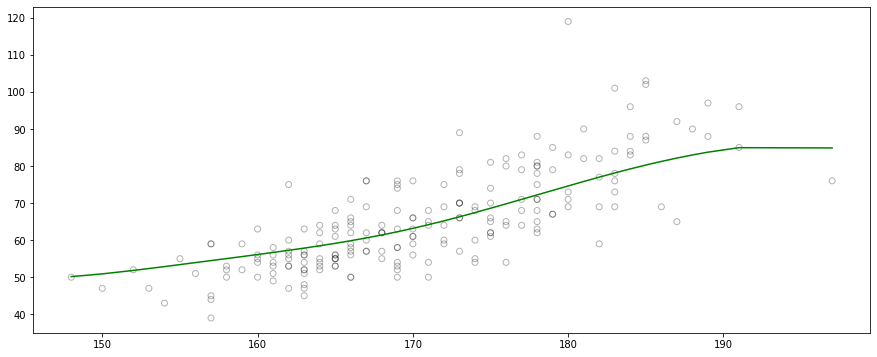

In [24]:
height_grid = np.arange(hwdata.height.min(), hwdata.height.max()).reshape(-1,1)
pred_local = local_regression.predict(hwdata[['height']])
# Scatter plot with polynomial regression line
plt.figure(figsize=(15,6))
plt.scatter(hwdata.height, hwdata.weight, facecolor='None', edgecolor='k', alpha=0.3)
plt.plot(hwdata.height, pred_local, color='g', label='local regression')

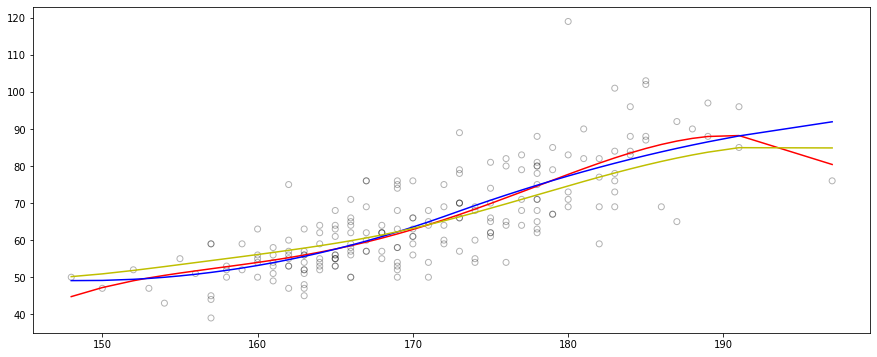

In [25]:
# Plot together
plt.figure(figsize=(15,6))
plt.scatter(hwdata.height, hwdata.weight, facecolor='None', edgecolor='k', alpha=0.3)
plt.plot(hwdata.height, pred_poly, color='r', label='polynomial regression df=4')
plt.plot(hwdata.height, pred_splines, color='b', label='Natural spline df=4')
plt.plot(hwdata.height, pred_local, color='y', label='Local regression')